<a href="https://colab.research.google.com/github/Juhainayasmin09/Housing-Price-Prediction/blob/main/Set_5_juhaina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('housing.csv', encoding='ascii')

# Checking the shape and basic info
print("Dataset shape:", df.shape)
print("\
Column names:")
print(df.columns.tolist())
print("\
Data types:")
print(df.dtypes)
print("\
First few rows:")
print(df.head())

Dataset shape: (20640, 10)
Column names:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
First few rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   


Code Explanation
This code snippet loads a housing dataset and performs initial exploration by checking its shape, column names, data types, and displaying the first few rows.
- Load the housing dataset from a CSV file
- Print the shape of the dataset
- Print the column names
- Print the data types of each column
- Display the first few rows of the dataset

In [18]:
# Checking for missing values and basic statistics
print("Missing values:")
print(df.isnull().sum())
print("\
Basic statistics:")
print(df.describe())

Missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Basic statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  me

**Code Explanation**

This code snippet checks for missing values in the DataFrame and prints basic statistical information about its numerical columns.
- *Check for missing values in the DataFrame*
- *Print the count of missing values for each column*
- *Calculate and print basic statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns*

In [19]:
# Handle missing values and prepare data for modeling
# Fill missing total_bedrooms with median value
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Convert categorical variable to dummy variables
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Prepare features (X) and target (y)
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\
Feature columns:")
print(X.columns.tolist())

Features shape: (20640, 12)
Target shape: (20640,)
Feature columns:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


/tmp/ipython-input-19-1422182754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


**Code Explanation**

This code snippet fills missing values in the 'total_bedrooms' column with the median, converts categorical variables into dummy variables, and separates the features and target variable for modeling.

- *Fill missing values in 'total_bedrooms' with median*
- *Convert 'ocean_proximity' categorical variable to dummy variables*
- *Prepare features (X) by dropping 'median_house_value'*
- *Prepare target (y) as 'median_house_value'*
- *Print shapes of features and target, and list feature columns*

In [20]:
# Spliting data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 16512
Testing set size: 4128


**Code Explanation**

*This code snippet splits the dataset into training and testing sets using an 80-20 ratio.*
- *Split dataset X and labels y into training and testing sets*
- *Use 80% of the data for training and 20% for testing*
- *Set a random seed for reproducibility*
- *Print the size of the training and testing sets*

In [21]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print("R-squared score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Model Performance:
R-squared score: 0.6254240620553614
Mean Squared Error: 4908476721.156606
Root Mean Squared Error: 70060.5218447351


**Code Explanation**

This code snippet trains a linear regression model on the training data and evaluates its performance using R-squared, Mean Squared Error, and Root Mean Squared Error metrics.

- *Initialize Linear Regression model*
- *Fit model on training data*
- *Predict outcomes on test data*
- *Calculate R-squared score*
- *Calculate Mean Squared Error*
- *Calculate Root Mean Squared Error*
- *Print model performance metrics*

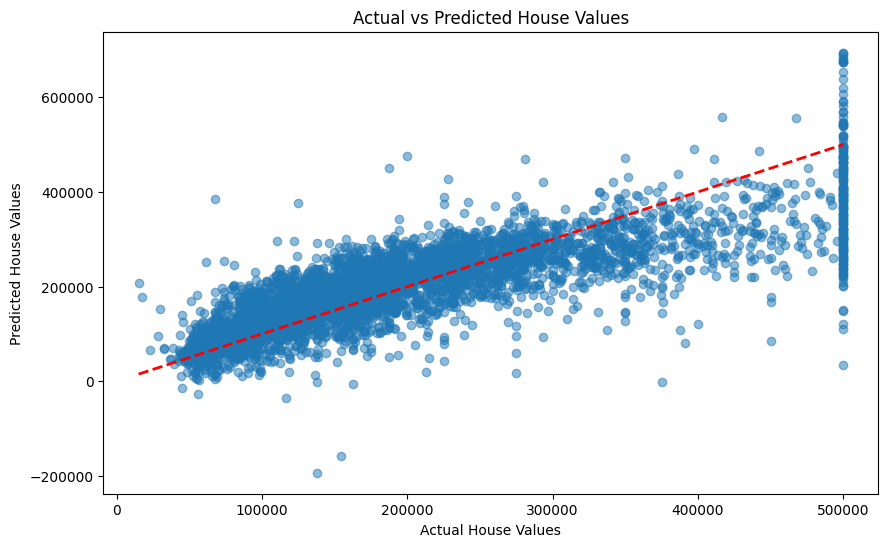

Feature Importance (Linear Regression Coefficients):
                       feature    coefficient
9       ocean_proximity_ISLAND  136125.072615
8       ocean_proximity_INLAND  -39786.656161
7                median_income   39473.975175
0                    longitude  -26838.273372
1                     latitude  -25468.352050
10    ocean_proximity_NEAR BAY   -5136.642217
11  ocean_proximity_NEAR OCEAN    3431.140073
2           housing_median_age    1102.185084
4               total_bedrooms     102.789395
6                   households      48.252753
5                   population     -38.172906
3                  total_rooms      -6.021506


In [22]:
# Create visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

# Show feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("Feature Importance (Linear Regression Coefficients):")
print(feature_importance)

**Code Explanation**

This code visualizes the relationship between actual and predicted house values and displays the importance of each feature based on the linear regression coefficients.

- *Create a scatter plot of actual vs predicted house values*
- *Add a reference line for perfect predictions*
- *Label the axes and title the plot*
- *Display the plot*
- *Calculate and display feature importance based on model coefficients*

## The model shows that ocean proximity (especially ISLAND locations), median income, and geographic coordinates (longitude/latitude) are the most influential factors in predicting house values.


